In [16]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
# Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bd040774-7e45-4335-8801-5c2d4feb5cf5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

In [3]:
type(data)

dict

In [5]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980430e+07,1.980430e+07,False,NaN,1,None,None,None,2025-01-01T22:02:00.000Z,94743.741927,2.438491e+10,-46.6394,0.067663,1.152521,-3.785763,-0.740939,36.475276,55.940247,1.876333e+12,56.3797,1.989619e+12,None,2025-01-01T22:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 16:04:06.720388
1,1027,Ethereum,ETH,ethereum,9768,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204745e+08,1.204745e+08,True,NaN,2,None,None,None,2025-01-01T22:02:00.000Z,3359.215462,1.431990e+10,-34.7485,0.112544,0.522726,-3.066916,-7.093304,34.747501,43.034804,4.046998e+11,12.1605,4.046998e+11,None,2025-01-01T22:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 16:04:06.720388
2,825,Tether USDt,USDT,tether,110799,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.374427e+11,1.414401e+11,True,NaN,3,None,None,None,2025-01-01T22:02:00.000Z,0.997950,6.758013e+10,-29.0234,0.002980,-0.015918,-0.122515,-0.236039,-0.201458,-0.198655,1.371609e+11,4.1214,1.411502e+11,None,2025-01-01T22:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-01 16:04:06.720388
3,52,XRP,XRP,xrp,1491,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.741023e+10,9.998674e+10,False,NaN,4,None,None,None,2025-01-01T22:02:00.000Z,2.316866,7.144899e+09,48.1263,0.516531,10.619027,0.778126,-14.466496,355.193656,341.208651,1.330118e+11,3.9968,2.316866e+11,None,2025-01-01T22:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 16:04:06.720388
4,1839,BNB,BNB,bnb,2321,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440070e+08,1.440070e+08,False,NaN,5,None,None,None,2025-01-01T22:02:00.000Z,706.530405,1.497877e+09,-35.8624,-0.062347,0.760721,1.129192,10.132362,23.993494,29.789897,1.017453e+11,3.0573,1.017453e+11,None,2025-01-01T22:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 16:04:06.720388
5,5426,Solana,SOL,solana,817,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.828195e+08,5.913463e+08,True,NaN,6,None,None,None,2025-01-01T22:02:00.000Z,194.364036,2.433057e+09,-24.5978,0.176284,0.899304,-0.983188,-12.580913,16.870928,41.787880,9.384274e+10,2.8198,1.149364e+11,None,2025-01-01T22:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 16:04:06.720388
6,74,Dogecoin,DOGE,dogecoin,1136,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.474475e+11,1.474475e+11,True,NaN,7,None,None,None,2025-01-01T22:02:00.000Z,0.326268,1.501648e+09,-32.7179,0.450199,2.909502,-1.582224,-22.603110,105.360343,211.075030,4.810743e+10,1.4455,4.810743e+10,None,2025-01-01T22:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 16:04:06.720388
7,3408,USDC,USDC,usd-coin,24335,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.376652e+10,4.376652e+10,False,NaN,8,None,None,None,2025-01-01T22:02:00.000Z,0.999951,4.933810e+09,-26.5559,0.003984,-0.003024,-0.011298,-0.014700,-0.024146,-0.007671,4.376439e+10,1.3150,4.376439e+10,None,2025-01-01T22:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-01 16:04:06.720388
8,2010,Cardano,ADA,cardano,1424,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smar

In [44]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bd040774-7e45-4335-8801-5c2d4feb5cf5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
        
# NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    # df2 = pd.json_normalize(data['data'])
    # df2['Timestamp'] = pd.to_datetime('now')
    # df_append = pd.DataFrame(df2)
    # df = pd.concat([df,df_append])

    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df)
    df = pd.concat([df,df_append])

    if not os.path.isfile(r'C:\Users\kkiku\OneDrive\Documents\Data Analyst\Pandas Projects\API.csv'):
        df.to_csv(r'C:\Users\kkiku\OneDrive\Documents\Data Analyst\Pandas Projects\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\kkiku\OneDrive\Documents\Data Analyst\Pandas Projects\API.csv', mode='a', header=False)
        
    # Then to read in the file: 
df = pd.read_csv(r'C:\Users\kkiku\OneDrive\Documents\Data Analyst\Pandas Projects\API.csv')

In [ ]:
import os 
from time import time
from time import sleep

for i in range(300):
    api_runner()
    print('API Runner successful')
    sleep(60) #sleep for 1 minute
exit()

In [48]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.980426e+07,1.980426e+07,False,NaN,1,NaN,NaN,NaN,2025-01-01T20:04:00.000Z,94524.022303,2.466053e+10,-49.5327,0.423609,0.563980,-4.611699,-1.565915,36.054199,54.912499,1.871978e+12,56.4341,1.985004e+12,NaN,2025-01-01T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 14:06:24.072882
1,1,1027,Ethereum,ETH,ethereum,9767,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204745e+08,1.204745e+08,True,NaN,2,NaN,NaN,NaN,2025-01-01T20:05:00.000Z,3352.402963,1.447581e+10,-37.9400,0.304011,0.010910,-3.623552,-7.287358,34.541569,42.397366,4.038790e+11,12.1792,4.038790e+11,NaN,2025-01-01T20:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 14:06:24.072882
2,2,825,Tether USDt,USDT,tether,110798,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.374427e+11,1.414401e+11,True,NaN,3,NaN,NaN,NaN,2025-01-01T20:05:00.000Z,0.997890,6.635101e+10,-34.2662,0.024458,-0.059809,-0.116516,-0.243322,-0.192442,-0.198898,1.371527e+11,4.1359,1.411417e+11,NaN,2025-01-01T20:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-01 14:06:24.072882
3,3,52,XRP,XRP,xrp,1491,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.741023e+10,9.998674e+10,False,NaN,4,NaN,NaN,NaN,2025-01-01T20:05:00.000Z,2.307128,6.593239e+09,49.4220,-0.441354,10.310931,-0.056821,-16.488062,352.560029,338.203251,1.324527e+11,3.9942,2.307128e+11,NaN,2025-01-01T20:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 14:06:24.072882
4,4,1839,BNB,BNB,bnb,2321,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440070e+08,1.440070e+08,False,NaN,5,NaN,NaN,NaN,2025-01-01T20:05:00.000Z,706.763893,1.589346e+09,-30.8362,0.251518,0.571397,0.366334,10.535008,24.065253,29.492259,1.017789e+11,3.0692,1.017789e+11,NaN,2025-01-01T20:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 14:06:24.072882
5,5,5426,Solana,SOL,solana,817,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.828206e+08,5.913474e+08,True,NaN,6,NaN,NaN,NaN,2025-01-01T20:04:00.000Z,193.151160,2.402124e+09,-27.2323,0.976943,-0.324733,-3.272425,-13.880657,16.902057,40.575474,9.325736e+10,2.8114,1.142194e+11,NaN,2025-01-01T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 14:06:24.072882
6,6,74,Dogecoin,DOGE,dogecoin,1136,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.474464e+11,1.474464e+11,True,NaN,7,NaN,NaN,NaN,2025-01-01T20:05:00.000Z,0.324819,1.470808e+09,-33.0344,0.211096,2.182078,-2.612741,-23.507758,103.554796,209.666707,4.789345e+10,1.4443,4.789345e+10,NaN,2025-01-01T20:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-01 14:06:24.072882
7,7,3408,USDC,USDC,usd-coin,24334,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.377763e+10,4.377763e+10,False,NaN,8,NaN,NaN,NaN,2025-01-01T20:05:00.000Z,0.999941,4.876983e+09,-33.1378,-0.003703,0.001668,-0.014126,-0.007617,-0.015706,-0.006875,4.377505e+10,1.3201,4.377505e+10,NaN,2025-01-01T20:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-01 14:06:24.072882
8,8,2010,Cardano,ADA,cardano,1424,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research

In [50]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [74]:
# Looking at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23419,1.03216,-4.20412,-1.13400,36.18713,55.63345
Ethereum,0.18227,0.32982,-3.28171,-7.24299,34.53909,42.96398
Tether USDt,0.01419,-0.02560,-0.12346,-0.23011,-0.18574,-0.20085
XRP,-0.03745,10.13129,0.10265,-15.53744,352.93537,339.60844
BNB,0.10575,0.74204,0.78976,10.30523,23.99612,29.89454
Solana,0.52176,0.21677,-1.98897,-13.19438,16.56356,41.80101
Dogecoin,0.36857,2.59992,-2.03528,-23.23928,103.82818,210.65394
USDC,0.00134,0.00318,-0.01242,-0.00703,-0.01148,-0.00903
Cardano,0.18609,8.42236,0.81698,-23.50907,162.34574,168.97099


In [76]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.23419
             quote.USD.percent_change_24h     1.03216
             quote.USD.percent_change_7d     -4.20412
             quote.USD.percent_change_30d    -1.13400
             quote.USD.percent_change_60d    36.18713
             quote.USD.percent_change_90d    55.63345
Ethereum     quote.USD.percent_change_1h      0.18227
             quote.USD.percent_change_24h     0.32982
             quote.USD.percent_change_7d     -3.28171
             quote.USD.percent_change_30d    -7.24299
             quote.USD.percent_change_60d    34.53909
             quote.USD.percent_change_90d    42.96398
Tether USDt  quote.USD.percent_change_1h      0.01419
             quote.USD.percent_change_24h    -0.02560
             quote.USD.percent_change_7d     -0.12346
             quote.USD.percent_change_30d    -0.23011
             quote.USD.percent_change_60d    -0.18574
             quote.USD.percent_change_90

In [78]:
type(df4)

pandas.core.series.Series

In [80]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.23419
            quote.USD.percent_change_24h   1.03216
            quote.USD.percent_change_7d   -4.20412
            quote.USD.percent_change_30d  -1.13400
            quote.USD.percent_change_60d  36.18713
            quote.USD.percent_change_90d  55.63345
Ethereum    quote.USD.percent_change_1h    0.18227
            quote.USD.percent_change_24h   0.32982
            quote.USD.percent_change_7d   -3.28171
            quote.USD.percent_change_30d  -7.24299
            quote.USD.percent_change_60d  34.53909
            quote.USD.percent_change_90d  42.96398
Tether USDt quote.USD.percent_change_1h    0.01419
            quote.USD.percent_change_24h  -0.02560
            quote.USD.percent_change_7d   -0.12346
            quote.USD.percent_change_30d  -0.23011
            quote.USD.percent_change_60d  -0.18574
            quote.USD.percent_change_90d  -0.20085
XRP         quote.USD.percent_change_1h   -0.03745
            quote.USD.percent_change_24h  10.13129
            quote.USD.percent_change_7d    0.10265
            quote.USD.percent_change_30d -15.53744
            quote.USD.percent_change_60d 352.93537
            quote.USD.percent_change_90d 339.60844
BNB         quote.USD.percent_change_1h    0.10575
            quote.USD.percent_change_24h   0.74204
            quote.USD.percent_change_7d    0.78976
            quote.USD.percent_change_30d  10.30523
            quote.USD.percent_change_60d  23.99612
            quote.USD.percent_change_90d  29.89454
Solana      quote.USD.percent_change_1h    0.52176
            quote.USD.percent_change_24h   0.21677
            quote.USD.percent_change_7d   -1.98897
            quote.USD.percent_change_30d -13.19438
            quote.USD.percent_change_60d  16.56356
            quote.USD.percent_change_90d  41.80101
Dogecoin    quote.USD.percent_change_1h    0.36857
            quote.USD.percent_change_24h   2.59992
            quote.USD.percent_change_7d   -2.03528
            quote.USD.percent_change_30d -23.23928
            quote.USD.percent_change_60d 103.82818
            quote.USD.percent_change_90d 210.65394
USDC        quote.USD.percent_change_1h    0.00134
            quote.USD.percent_change_24h   0.00318
            quote.USD.percent_change_7d   -0.01242
            quote.USD.percent_change_30d  -0.00703
            quote.USD.percent_change_60d  -0.01148
            quote.USD.percent_change_90d  -0.00903
Cardano     quote.USD.percent_change_1h    0.18609
            quote.USD.percent_change_24h   8.42236
            quote.USD.percent_change_7d    0.81698
            quote.USD.percent_change_30d -23.50907
            quote.USD.percent_change_60d 162.34574
            quote.USD.percent_change_90d 168.97099
TRON        quote.USD.percent_change_1h    0.03742
            quote.USD.percent_change_24h   0.25621
            quote.USD.percent_change_7d   -0.71423
            quote.USD.percent_change_30d  18.02519
            quote.USD.percent_change_60d  53.69745
            quote.USD.percent_change_90d  62.51791
Avalanche   quote.USD.percent_change_1h    0.99384
            quote.USD.percent_change_24h   4.57633
            quote.USD.percent_change_7d   -6.83542
            quote.USD.percent_change_30d -24.37327
            quote.USD.percent_change_60d  54.90063
            quote.USD.percent_change_90d  52.16057
Toncoin     quote.USD.percent_change_1h    0.13002
            quote.USD.percent_change_24h   0.48749
            quote.USD.percent_change_7d   -7.03712
            quote.USD.percent_change_30d -15.56350
            quote.USD.percent_change_60d  13.04953
            quote.USD.percent_change_90d   3.94935
Chainlink   quote.USD.percent_change_1h    0.91578
            quote.USD.percent_change_24h   8.43823
            quote.USD.percent_change_7d  -11.35604
            quote.USD.percent_change_30d -12.51291
            quote.USD.percent_change_60d  93.04857
            quo

In [82]:
df5.count()

values    90
dtype: int64

In [88]:
# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# Using set_index() function
# df6 = df5.set_index(index)
# df6
# If the above did not show "level_1 column"
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23419
1,Bitcoin,quote.USD.percent_change_24h,1.03216
2,Bitcoin,quote.USD.percent_change_7d,-4.20412
3,Bitcoin,quote.USD.percent_change_30d,-1.13400
4,Bitcoin,quote.USD.percent_change_60d,36.18713
5,Bitcoin,quote.USD.percent_change_90d,55.63345
6,Ethereum,quote.USD.percent_change_1h,0.18227
7,Ethereum,quote.USD.percent_change_24h,0.32982
8,Ethereum,quote.USD.percent_change_7d,-3.28171
9,Ethereum,quote.USD.percent_change_30d,-7.24299


In [90]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23419
1,Bitcoin,quote.USD.percent_change_24h,1.03216
2,Bitcoin,quote.USD.percent_change_7d,-4.20412
3,Bitcoin,quote.USD.percent_change_30d,-1.13400
4,Bitcoin,quote.USD.percent_change_60d,36.18713
5,Bitcoin,quote.USD.percent_change_90d,55.63345
6,Ethereum,quote.USD.percent_change_1h,0.18227
7,Ethereum,quote.USD.percent_change_24h,0.32982
8,Ethereum,quote.USD.percent_change_7d,-3.28171
9,Ethereum,quote.USD.percent_change_30d,-7.24299


In [92]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23419
1,Bitcoin,24h,1.03216
2,Bitcoin,7d,-4.20412
3,Bitcoin,30d,-1.13400
4,Bitcoin,60d,36.18713
5,Bitcoin,90d,55.63345
6,Ethereum,quote.USD.percent_change_1h,0.18227
7,Ethereum,24h,0.32982
8,Ethereum,7d,-3.28171
9,Ethereum,30d,-7.24299


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

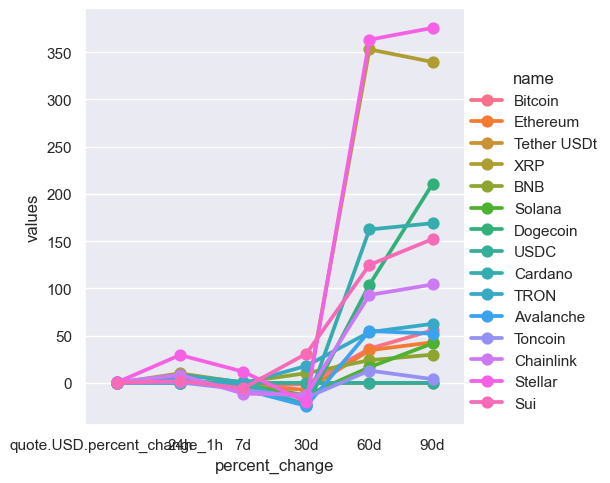

In [96]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [104]:
# Now to do something much simpler, we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,94524.02230,2025-01-01 14:06:24.072882
15,Bitcoin,94524.02230,2025-01-01 14:06:24.072882
30,Bitcoin,94563.56850,2025-01-01 14:07:24.248560
45,Bitcoin,94563.56850,2025-01-01 14:07:24.248560
60,Bitcoin,94563.56850,2025-01-01 14:08:24.466800
75,Bitcoin,94563.56850,2025-01-01 14:08:24.466800
90,Bitcoin,94569.56583,2025-01-01 14:09:24.621852
105,Bitcoin,94569.56583,2025-01-01 14:09:24.621852
120,Bitcoin,94569.56583,2025-01-01 14:10:24.780415
135,Bitcoin,94569.56583,2025-01-01 14:10:24.780415


C:\Users\kkiku\AppData\Local\Temp\ipykernel_2520\2671790146.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


[Text(0, 0, '2025-01-01 14:06:24.072882'),
 Text(1, 0, '2025-01-01 14:07:24.248560'),
 Text(2, 0, '2025-01-01 14:08:24.466800'),
 Text(3, 0, '2025-01-01 14:09:24.621852'),
 Text(4, 0, '2025-01-01 14:10:24.780415'),
 Text(5, 0, '2025-01-01 14:40:38.726372'),
 Text(6, 0, '2025-01-01 14:41:38.943269'),
 Text(7, 0, '2025-01-01 14:42:39.117613'),
 Text(8, 0, '2025-01-01 14:43:39.324752'),
 Text(9, 0, '2025-01-01 14:44:26.295455'),
 Text(10, 0, '2025-01-01 14:45:26.505992'),
 Text(11, 0, '2025-01-01 14:46:26.678477'),
 Text(12, 0, '2025-01-01 14:47:26.879209'),
 Text(13, 0, '2025-01-01 14:48:31.540497'),
 Text(14, 0, '2025-01-01 14:49:31.780475'),
 Text(15, 0, '2025-01-01 14:50:31.949267'),
 Text(16, 0, '2025-01-01 14:51:32.122541'),
 Text(17, 0, '2025-01-01 14:52:32.326400'),
 Text(18, 0, '2025-01-01 14:53:32.517715'),
 Text(19, 0, '2025-01-01 14:54:32.678510'),
 Text(20, 0, '2025-01-01 14:55:32.910938'),
 Text(21, 0, '2025-01-01 14:56:33.125031'),
 Text(22, 0, '2025-01-01 14:57:33.313093')

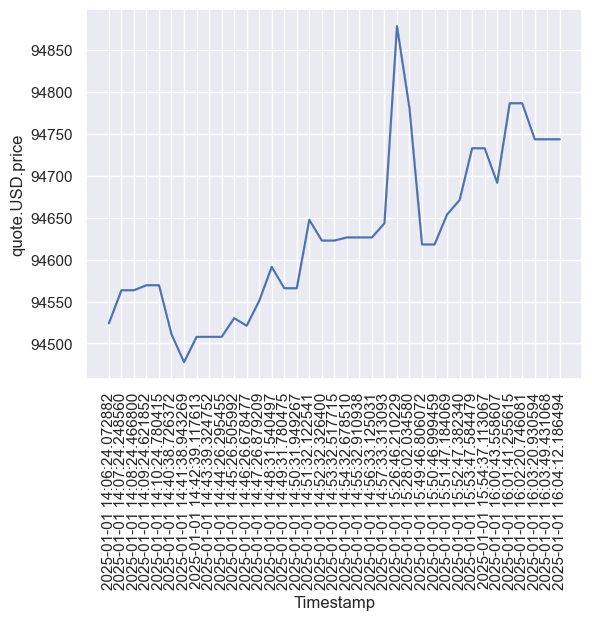

In [136]:
sns.set_theme(style="darkgrid")

axes=sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)